## Import the required liberaries and the csv dataset file

In [3]:
import pandas as pd
import numpy as np
import re
from langdetect import detect, DetectorFactory
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("googleplaystore.csv")

## Show the first 5 rows

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Show the dataset info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Statestical Data of the dataset

In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Change object columns into Integer

### 1. Reviwes

In [8]:
# find the string value cause I got an error while converting the entire column 
df[df['Reviews'].str.contains(r'[^0-9,]')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
# Delete the M
df.loc[10472, 'Reviews'] = "3,000,000"

In [10]:
# convert the column
df['Reviews'] = df['Reviews'].str.replace(',', '').astype(int)

In [11]:
# Double check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


### 2. Installs

In [12]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [13]:
# Remove the + and spaces
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)

In [14]:
# double check
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', 'Free'],
      dtype=object)

In [15]:
df[df['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
# change Free to nan value
df.loc[10472, 'Installs'] = np.nan

In [17]:
# convert the column
df['Installs'] = df['Installs'].astype('Int64')

In [18]:
# Display the column statistics to decide the right value to be set in the NaN value
df['Installs'].describe()

count            10840.0
mean     15464338.882565
std      85029361.395463
min                  0.0
25%               1000.0
50%             100000.0
75%            5000000.0
max         1000000000.0
Name: Installs, dtype: Float64

In [19]:
df['Installs'].unique()

<IntegerArray>
[     10000,     500000,    5000000,   50000000,     100000,      50000,
    1000000,   10000000,       5000,  100000000, 1000000000,       1000,
  500000000,         50,        100,        500,         10,          1,
          5,          0,       <NA>]
Length: 21, dtype: Int64

#### I just realized that row 10472 has a problem in all the data and it seems that a shift occure !
#### My call is to re-order the data to assign the right value to the right column

In [20]:
# show the app names and category to descide which category I should choose
print(df['App'].unique())
print(df['Category'].unique())

['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [21]:
df.loc[10472, ['Category', 'Rating', 'Size', 'Installs', 'Type', 
               'Price', 'Content Rating', 'Genres', 'Last Updated', 
               'Current Ver', 'Android Ver']] = [
    'PHOTOGRAPHY', 1.9, '19M', 1000, 'Free', '0', 'Everyone', "Photography & Lifestyle",
    'February 11, 2018', '1.0.19', '4.0 and up'
]

In [22]:
# double check on the row values
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                      PHOTOGRAPHY
Rating                                                1.9
Reviews                                           3000000
Size                                                  19M
Installs                                             1000
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                            Photography & Lifestyle
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  Int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(10)
memory usage: 1.1+ MB


### 3. Price

In [24]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [25]:
df['Price'] = df['Price'].str.replace('$', '', regex=False).str.strip()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  Int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: Int64(1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


In [27]:
# additional step to confirm the the type column is correct and the free apps are equal zero in the price
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [28]:
# free = 0
df[(df['Type'] == 'Free') & (df['Price'] != 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [29]:
# paid != 0
df[(df['Type'] == 'Paid') & (df['Price'] == 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [30]:
# find nan value
df[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [31]:
# fix the nan as the price = 0 then type should be free
df.loc[9148, ['Type', ]] = ['Free']
# double check on the row values
df.loc[9148]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  NaN
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                   0.0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  Int64  
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: Int64(1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


### 4. Size

In [33]:
# show unique
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [34]:
df['Size'].str.extract(r'([A-Za-z]+)').value_counts()

0     
M         8830
Varies    1695
k          316
Name: count, dtype: int64

In [35]:
df[df['Size'].str.contains('Varies', na=False)]['Size'].unique()

array(['Varies with device'], dtype=object)

In [36]:
df[df['Size'].str.contains('M', na=False)]['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M',
       '7.9M', '56M', '57M', '35M', '54M', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M', '2.9M', '38M', '32M',
       '5.4M', '18M', '1.1M', '2.2M', '4.5M', '9.8M', '52M', '9.0M',
       '6.7M', '30M', '2.6M', '7.1M', '3.7M', '22M', '7.4M', '6.4M',
       '3.2M', '8.2M', '9.9M', '4.9M', '9.5M', '5.0M', '5.9M', '13M',
       '73M', '6.8M', '3.5M', '4.0M', '2.3M', '7.2M', '2.1M', '42M',
       '7.3M', '9.1M', '55M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M',
       '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M',
       '8.8M', '6.6M', '5.1M', '61M', '66M', '8.4M', '44M', '1.6M',
       '6.2M', '53M', '1.4M', '3.0M', '5.8M', '3.8M', '9.6M', '45M',
   

In [37]:
df[df['Size'].str.contains('k', na=False)]['Size'].unique()

array(['201k', '23k', '79k', '118k', '695k', '18k', '556k', '526k',
       '334k', '232k', '624k', '8.5k', '41k', '292k', '11k', '704k',
       '862k', '899k', '378k', '266k', '375k', '975k', '980k', '696k',
       '544k', '525k', '920k', '779k', '853k', '720k', '713k', '772k',
       '318k', '58k', '241k', '196k', '857k', '51k', '953k', '865k',
       '251k', '930k', '540k', '313k', '746k', '203k', '26k', '314k',
       '239k', '371k', '220k', '730k', '756k', '91k', '293k', '17k',
       '74k', '14k', '317k', '78k', '924k', '902k', '818k', '81k', '939k',
       '169k', '45k', '475k', '965k', '545k', '61k', '283k', '655k',
       '714k', '93k', '872k', '121k', '322k', '976k', '172k', '238k',
       '549k', '206k', '954k', '444k', '717k', '210k', '609k', '308k',
       '705k', '306k', '904k', '473k', '175k', '350k', '383k', '454k',
       '421k', '70k', '812k', '442k', '842k', '417k', '412k', '459k',
       '478k', '335k', '782k', '721k', '430k', '429k', '192k', '200k',
       '460k', '

In [38]:
# change all the size to be in megabyte
def convert_size(value):
    if pd.isna(value) or value == 'Varies with device':
        return pd.NA
    value = str(value).strip().upper()
    if value.endswith('M'):
        return float(value.replace('M', ''))
    elif value.endswith('K'):
        return float(value.replace('K', '')) / 1024
    elif value == '0':  
        return pd.NA
    else:
        return pd.NA
df['SizeMB'] = df['Size'].apply(convert_size)

In [39]:
# Convert into float
df['SizeMB'] = pd.to_numeric(df['SizeMB'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  Int64  
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  SizeMB          9146 non-null   float64
dtypes: Int64(1), float64(3), int64(1), object(9)
memory usage: 1.2+ MB


##### Kindly note that "Varies with device" in the Size are now NaN in SizeMB, The feature is not used in a model yet 
##### so I'll let it be as it is and I'll descide later how should I fill the NaN depeding on the model

### 5. Last Updated

In [40]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  Int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
 13  SizeMB          9146 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(3), int64(1), 

## Fixing Data

### I'll go through each column to check if it contatins the right data or not

#### 1. App

In [41]:
# Nan values in App
df['App'].isnull().sum()

np.int64(0)

In [42]:
# Check unique values
unique_apps = df['App'].nunique()
print(f"No. of unique Apps {unique_apps}")

No. of unique Apps 9660


In [43]:
# Show the duplicates apps into new dataframe to check on them
duplicate_apps = df[df.duplicated(subset='App', keep=False)]
duplicate_apps = duplicate_apps.sort_values('App')
print(duplicate_apps.head(4))

                             App            Category  Rating  Reviews  Size  \
1393       10 Best Foods for You  HEALTH_AND_FITNESS     4.0     2490  3.8M   
1407       10 Best Foods for You  HEALTH_AND_FITNESS     4.0     2490  3.8M   
2543  1800 Contacts - Lens Store             MEDICAL     4.7    23160   26M   
2322  1800 Contacts - Lens Store             MEDICAL     4.7    23160   26M   

      Installs  Type  Price Content Rating            Genres Last Updated  \
1393    500000  Free    0.0   Everyone 10+  Health & Fitness   2017-02-17   
1407    500000  Free    0.0   Everyone 10+  Health & Fitness   2017-02-17   
2543   1000000  Free    0.0       Everyone           Medical   2018-07-27   
2322   1000000  Free    0.0       Everyone           Medical   2018-07-27   

     Current Ver   Android Ver  SizeMB  
1393         1.9  2.3.3 and up     3.8  
1407         1.9  2.3.3 and up     3.8  
2543       7.4.1    5.0 and up    26.0  
2322       7.4.1    5.0 and up    26.0  


In [44]:
# I just found out that there are apps are identical in all the row, I see to drop the idetical rows if they have the same values exactly
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          8893 non-null   float64       
 3   Reviews         10358 non-null  int64         
 4   Size            10358 non-null  object        
 5   Installs        10358 non-null  Int64         
 6   Type            10358 non-null  object        
 7   Price           10358 non-null  float64       
 8   Content Rating  10358 non-null  object        
 9   Genres          10358 non-null  object        
 10  Last Updated    10358 non-null  datetime64[ns]
 11  Current Ver     10350 non-null  object        
 12  Android Ver     10356 non-null  object        
 13  SizeMB          8832 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(3), int64(1), objec

In [45]:
# check unique again
update_unique_apps = df['App'].nunique()
print(f"No. of unique Apps {update_unique_apps}")

No. of unique Apps 9660


In [46]:
duplicates_partial = df[df.duplicated(subset='App', keep=False)]
print("No. of duplicated apps AGAIN!:", duplicates_partial['App'].nunique())

duplicates_partial = duplicates_partial.sort_values('App')
print(duplicates_partial.head(10))

No. of duplicated apps AGAIN!: 523
                                  App Category  Rating   Reviews Size  \
5415          365Scores - Live Scores   SPORTS     4.6    666246  25M   
3083          365Scores - Live Scores   SPORTS     4.6    666521  25M   
1755                      8 Ball Pool     GAME     4.5  14200344  52M   
1703                      8 Ball Pool     GAME     4.5  14198602  52M   
1871                      8 Ball Pool     GAME     4.5  14201891  52M   
1844                      8 Ball Pool     GAME     4.5  14200550  52M   
1675                      8 Ball Pool     GAME     4.5  14198297  52M   
1970                      8 Ball Pool     GAME     4.5  14201604  52M   
3953                      8 Ball Pool   SPORTS     4.5  14184910  52M   
559   95Live -SG#1 Live Streaming App   DATING     4.1      4953  15M   

       Installs  Type  Price Content Rating  Genres Last Updated Current Ver  \
5415   10000000  Free    0.0       Everyone  Sports   2018-07-29       5.5.9   
3

In [47]:
# I found some apps are repeated because of the Reviews number is changing, So I'll keep the app with higher review number as it is more resonable
# as the the review increased over time
df = df.loc[df.groupby('App')['Reviews'].idxmax()]
 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 8884 to 882
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          8197 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   Int64         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
 13  SizeMB          8432 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(3), int64(1), objec

In [49]:
# check unique again
update_unique_apps = df['App'].nunique()
print(f"No. of unique Apps {update_unique_apps}")

No. of unique Apps 9660


#### 2. Category

In [50]:
df['Category'].unique()

array(['SPORTS', 'SOCIAL', 'COMICS', 'TOOLS', 'COMMUNICATION',
       'NEWS_AND_MAGAZINES', 'HEALTH_AND_FITNESS', 'FAMILY',
       'BOOKS_AND_REFERENCE', 'LIFESTYLE', 'BUSINESS', 'SHOPPING',
       'MEDICAL', 'GAME', 'FINANCE', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'TRAVEL_AND_LOCAL', 'DATING', 'PRODUCTIVITY', 'ART_AND_DESIGN',
       'FOOD_AND_DRINK', 'VIDEO_PLAYERS', 'HOUSE_AND_HOME',
       'MAPS_AND_NAVIGATION', 'EVENTS', 'EDUCATION', 'AUTO_AND_VEHICLES',
       'WEATHER', 'BEAUTY', 'ENTERTAINMENT', 'LIBRARIES_AND_DEMO',
       'PARENTING'], dtype=object)

In [51]:
print(df['Category'].value_counts())

Category
FAMILY                 1874
GAME                    946
TOOLS                   829
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             282
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               107
ENTERTAINMENT            87
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64


In [52]:
print("Sum of missing", df['Category'].isna().sum())


Sum of missing 0


In [53]:
df[df['Category'].str.contains('[^A-Za-z& ]', na=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100,Free,0.00,Everyone,News & Magazines,2018-07-06,1.0,4.2 and up,14.0
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,3.8
8219,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3.5M,500,Paid,0.99,Everyone,Books & Reference,2013-08-30,1.3,2.1 and up,3.5
6760,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,4.4,47,1.4M,1000,Paid,3.08,Everyone,Books & Reference,2016-05-27,1.22,2.2 and up,1.4
7338,20 Minuten (CH),NEWS_AND_MAGAZINES,3.5,14153,Varies with device,1000000,Free,0.00,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,صور حرف H,ART_AND_DESIGN,4.4,13,4.5M,1000,Free,0.00,Everyone,Art & Design,2018-03-27,2.0,4.0.3 and up,4.5
1488,"乐屋网: Buying a house, selling a house, renting ...",HOUSE_AND_HOME,3.7,2248,15M,100000,Free,0.00,Everyone,House & Home,2018-08-03,v3.1.1,4.0 and up,15.0
3824,乗換NAVITIME Timetable & Route Search in Japan T...,MAPS_AND_NAVIGATION,4.4,50459,Varies with device,5000000,Free,0.00,Everyone,Maps & Navigation,2018-07-26,Varies with device,Varies with device,NaN
5698,日本AV历史,BOOKS_AND_REFERENCE,4.1,215,30M,10000,Free,0.00,Teen,Books & Reference,2018-03-06,1.2,4.0 and up,30.0


##### I was searching for strange values in the category column and I found that categories are cleand and there is a non-english names!!, I'll try to fix it


In [54]:
# create new df to discover the problem
def has_non_english(text):
    if pd.isna(text):
        return False
    return bool(re.search(r'[^\x00-\x7F]', str(text)))
non_english_mask = df.applymap(lambda x: has_non_english(x))

C:\Users\Client\AppData\Local\Temp\ipykernel_23256\3524003871.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_english_mask = df.applymap(lambda x: has_non_english(x))


In [55]:
rows_with_non_english = df[non_english_mask.any(axis=1)]
rows_with_non_english.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500,Free,0.00,Everyone,Sports,2017-10-07,0.22,4.1 and up,3.6
10252,1. FC Köln App,SPORTS,4.6,2019,41M,100000,Free,0.00,Everyone,Sports,2018-07-20,1.13.0,4.4 and up,41.0
1997,1LINE – One Line with One Touch,GAME,4.6,214878,10M,10000000,Free,0.00,Everyone,Board,2018-08-03,2.0.4,4.1 and up,10.0
3448,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,115773,Varies with device,10000000,Free,0.00,Everyone,Personalization,2018-05-22,Varies with device,4.1 and up,NaN
6344,3D DJ – DJ Mixer 2018,FAMILY,4.3,6333,30M,1000000,Free,0.00,Everyone,Entertainment,2018-05-25,1.1.12,5.0 and up,30.0
8465,3D DJ – Music Mixer with Virtual DJ,FAMILY,4.3,796,28M,100000,Free,0.00,Everyone,Entertainment,2018-07-03,6.6.8,5.0 and up,28.0
8035,ABC – Live TV & Full Episodes,FAMILY,3.3,50428,Varies with device,5000000,Free,0.00,Teen,Entertainment,2018-07-25,Varies with device,5.0 and up,NaN
3799,AC - Tips & News for Android™,NEWS_AND_MAGAZINES,4.2,23292,14M,1000000,Free,0.00,Everyone 10+,News & Magazines,2018-05-24,3.1.12,4.1 and up,14.0
5266,AJ렌터카 법인 카셰어링,MAPS_AND_NAVIGATION,NaN,0,27M,10,Free,0.00,Everyone,Maps & Navigation,2018-07-30,1.0.0.0,4.3 and up,27.0
5454,AP App for Android™,NEWS_AND_MAGAZINES,3.6,188,9.9M,10000,Free,0.00,Everyone,News & Magazines,2016-05-12,1.0,4.0 and up,9.9


In [56]:
DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(str(text))
    except:
        return 'unknown'


df['language_App'] = df['App'].apply(detect_language)
print(df['language_App'].value_counts())

language_App
en         5303
de          951
ro          295
it          243
tl          239
pt          214
ca          213
es          199
nl          191
fr          185
id          175
no          163
af          149
tr          138
so          116
da          116
sv           98
et           94
cy           81
pl           75
sw           67
vi           64
fi           48
sl           44
lt           41
hr           29
hu           28
sk           23
lv           17
sq           16
cs           10
ja            8
ko            7
unknown       4
ar            4
zh-cn         3
ru            3
bn            2
bg            2
he            1
ur            1
Name: count, dtype: int64


##### I found many languages are included, My descision is to keep it as it is and wait until desciding what is the model will be applied on the data

#### 3. Rating

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 8884 to 882
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          8197 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   Int64         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
 13  SizeMB          8432 non-null   float64       
 14  language_App    9660 non-null   object        
dtypes: Int6

In [58]:
# rating has missing values and it must be between 1 and 5
# First, I'll search for wrong values
wrong_ratings = df[(df['Rating'] < 1) | (df['Rating'] > 5)]
wrong_ratings[['App','Rating','Reviews']].head()
# There is no wrong values

,App,Rating,Reviews


In [59]:
# Second, I'll look at the column info and description to desciede how to deal with the missing values
print(df['Rating'].info())
print(df['Rating'].describe())

<class 'pandas.core.series.Series'>
Index: 9660 entries, 8884 to 882
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
8197 non-null   float64
dtypes: float64(1)
memory usage: 150.9 KB
None
count    8197.000000
mean        4.172990
std         0.536808
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


In [60]:
# I see that there are 1463 missing values and the mean and median are almost equal, My call is to fill the missing using the median
# as the missin values are repreasinting 15% of the data and I already droped many duplicated values
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 8884 to 882
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   Int64         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
 13  SizeMB          8432 non-null   float64       
 14  language_App    9660 non-null   object        
dtypes: Int6

C:\Users\Client\AppData\Local\Temp\ipykernel_23256\2616927714.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)


#### 4. Reviews

In [61]:
# I need to double check on apps that has no installation will be zero in the reviews and rating
unused_apps = df[
    (df['Installs'] == 0) &
    ((df['Reviews'] > 0) | (df['Rating'].notna()))
]

print(f"No. of apps that are no installed {len(unused_apps)}")
unused_apps.head(10)

No. of apps that are no installed 15


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB,language_App
5486,AP Series Solution Pro,FAMILY,4.3,0,7.4M,0,Paid,1.99,Everyone,Education,2017-07-30,1.3,4.0 and up,7.4,en
5945,Ain Arabic Kids Alif Ba ta,FAMILY,4.3,0,33M,0,Paid,2.99,Everyone,Education,2016-04-15,1.0,3.0 and up,33.0,en
5307,Ak Parti Yardım Toplama,SOCIAL,4.3,0,8.7M,0,Paid,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up,8.7,tr
8081,CX Network,BUSINESS,4.3,0,10M,0,Free,0.00,Everyone,Business,2018-08-06,1.3.1,4.1 and up,10.0,en
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,Free,0.00,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,NaN,en
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,4.3,0,56M,0,Paid,3.99,Everyone,Travel & Local,2017-01-22,1.1.1,4.1 and up,56.0,es
9719,EP Cook Book,MEDICAL,4.3,0,3.2M,0,Paid,200.00,Everyone,Medical,2015-07-26,1.0,3.0 and up,3.2,nl
9917,Eu Sou Rico,FINANCE,4.3,0,1.4M,0,Paid,394.99,Everyone,Finance,2018-07-11,1.0,4.0.3 and up,1.4,pt
9905,Eu sou Rico,FINANCE,4.3,0,2.6M,0,Paid,30.99,Everyone,Finance,2018-01-09,1.0,4.0 and up,2.6,fr
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40M,0,Paid,399.99,Everyone,Lifestyle,2017-12-01,MONEY,4.1 and up,40.0,pt


In [62]:
# Rating values are not right, I'll replace it with zero 
df.loc[df['Installs'] == 0, 'Rating'] = 0
df[df['Installs'] == 0][['App', 'Installs', 'Reviews', 'Rating']]

,App,Installs,Reviews,Rating
5486,AP Series Solution Pro,0,0,0.0
5945,Ain Arabic Kids Alif Ba ta,0,0,0.0
5307,Ak Parti Yardım Toplama,0,0,0.0
8081,CX Network,0,0,0.0
9148,Command & Conquer: Rivals,0,0,0.0
9337,EG | Explore Folegandros,0,0,0.0
9719,EP Cook Book,0,0,0.0
9917,Eu Sou Rico,0,0,0.0
9905,Eu sou Rico,0,0,0.0
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0,0,0.0


In [63]:
# double check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 8884 to 882
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   Int64         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
 13  SizeMB          8432 non-null   float64       
 14  language_App    9660 non-null   object        
dtypes: Int6

#### 5. Size/SizeMB

In [64]:
# Size column could be ignored now.
# Kindly note that "Varies with device" in the Size are now NaN in SizeMB as I convered the column to be float and there is some apps' size are variable
# so I'll let it be as it is and I'll descide later how should I fill the NaN depeding on the model or igonre the feature

#### 6. Content Rating

In [65]:
df['Content Rating'].unique()

array(['Everyone', 'Mature 17+', 'Everyone 10+', 'Teen', 'Unrated',
       'Adults only 18+'], dtype=object)

In [66]:
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB,language_App
7312,Best CG Photography,FAMILY,4.3,1,2.5M,500,Free,0.0,Unrated,Entertainment,2015-06-24,5.2,3.0 and up,2.5,en
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4M,50000,Free,0.0,Unrated,Tools,2012-02-27,1.3,2.3.3 and up,6.4,en


In [67]:
# I think there is anything need modifications

#### 7. Content Genres

In [68]:
df['Genres'].unique()

array(['Sports', 'Social', 'Comics', 'Tools', 'Communication',
       'News & Magazines', 'Health & Fitness', 'Education',
       'Books & Reference', 'Puzzle', 'Lifestyle', 'Business', 'Shopping',
       'Medical', 'Board', 'Finance', 'Action', 'Personalization',
       'Casual', 'Arcade', 'Photography', 'Travel & Local',
       'Entertainment', 'Dating', 'Productivity', 'Art & Design',
       'Simulation', 'Food & Drink', 'Video Players & Editors', 'Racing',
       'Adventure', 'House & Home', 'Maps & Navigation', 'Events',
       'Educational;Education', 'Education;Education', 'Casino', 'Card',
       'Auto & Vehicles', 'Weather', 'Beauty', 'Educational', 'Strategy',
       'Music', 'Libraries & Demo', 'Role Playing', 'Trivia',
       'Entertainment;Creativity', 'Parenting',
       'Casual;Action & Adventure', 'Board;Brain Games',
       'Parenting;Music & Video', 'Casual;Pretend Play',
       'Travel & Local;Action & Adventure',
       'Role Playing;Action & Adventure', 'Education;

In [69]:
# I found that there is some rows has repeated Genres 
df[df['Genres'].str.contains(r'^(.*);\1$', regex=True, na=False)][['App', 'Genres']]

C:\Users\Client\AppData\Local\Temp\ipykernel_23256\2988959163.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['Genres'].str.contains(r'^(.*);\1$', regex=True, na=False)][['App', 'Genres']]


,App,Genres
729,ABC Preschool Free,Education;Education
2230,ABCmouse.com,Education;Education
5928,Arabic Alif Ba Ta For Kids,Education;Education
7473,CK-12 Physics Simulations,Education;Education
7462,CK-12: Practice Math & Science,Education;Education
825,ClassDojo,Education;Education
8620,Cursive Writing Wizard - Handwriting,Education;Education
715,Dinosaurs Coloring Pages,Education;Education
8439,Duolingo: Learn Languages Free,Education;Education
9287,EF Spelling Bee,Education;Education


In [70]:
# fix the repeatition
def fix_repeated_genres(value):
    if isinstance(value, str):
        parts = value.split(';')
        if len(parts) == 2 and parts[0].strip().lower() == parts[1].strip().lower():
            return parts[0].strip()
    return value

df['Genres'] = df['Genres'].apply(fix_repeated_genres)
df[df['Genres'].str.contains(';', na=False)]['Genres'].unique()

array(['Educational;Education', 'Entertainment;Creativity',
       'Casual;Action & Adventure', 'Board;Brain Games',
       'Parenting;Music & Video', 'Casual;Pretend Play',
       'Travel & Local;Action & Adventure',
       'Role Playing;Action & Adventure', 'Education;Pretend Play',
       'Action;Action & Adventure', 'Educational;Pretend Play',
       'Parenting;Education', 'Educational;Brain Games',
       'Casual;Creativity', 'Sports;Action & Adventure',
       'Puzzle;Creativity', 'Puzzle;Brain Games',
       'Education;Music & Video', 'Arcade;Action & Adventure',
       'Education;Brain Games', 'Entertainment;Music & Video',
       'Racing;Action & Adventure', 'Trivia;Education',
       'Entertainment;Brain Games', 'Casual;Brain Games',
       'Card;Action & Adventure', 'Education;Creativity',
       'Video Players & Editors;Music & Video', 'Art & Design;Creativity',
       'Educational;Creativity', 'Art & Design;Pretend Play',
       'Simulation;Action & Adventure', 'Books & Re

In [71]:
# double check
duplicates = df[df['Genres'].str.contains(r'^([^;]+);\1$', regex=True, na=False)]
print(duplicates[['App', 'Genres']])

Empty DataFrame
Columns: [App, Genres]
Index: []


C:\Users\Client\AppData\Local\Temp\ipykernel_23256\975140075.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  duplicates = df[df['Genres'].str.contains(r'^([^;]+);\1$', regex=True, na=False)]


#### 8. Last Updated

In [72]:
df['Last Updated'].isna().sum()

np.int64(0)

In [73]:
invalid_dates = df[(df['Last Updated'] > '2025-10-01') | (df['Last Updated'] < '2008-01-01')]
invalid_dates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB,language_App


In [74]:
# I think there is anything need modifications

#### 9. Current Ver

In [75]:
df['Current Ver'].isna().sum()

np.int64(8)

In [76]:
df['Current Ver'].unique()

array(['0.22', '5.03', '5.0.12', ..., '6.1.1', 'v3.1.1', '1.1.3.2'],
      shape=(2820,), dtype=object)

In [77]:
# search for a weird version format
weird_mask = ~df['Current Ver'].astype(str).str.match(r'^[0-9]+(\.[0-9]+)*$', na=False)
df[weird_mask].head(10)
# nothing need to be changed or corrected

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB,language_App
8703,"100000+ Messages - DP, Status, Jokes & GIF 2018",LIFESTYLE,3.7,121,3.8M,10000,Free,0.0,Mature 17+,Lifestyle,2017-12-29,DPSTATUS1.0.1,4.0.3 and up,3.8,et
7338,20 Minuten (CH),NEWS_AND_MAGAZINES,3.5,14153,Varies with device,1000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device,NaN,de
7330,20 minutes (CH),NEWS_AND_MAGAZINES,3.7,4379,Varies with device,1000000,Free,0.0,Teen,News & Magazines,2018-08-03,Varies with device,Varies with device,NaN,et
6518,2017 BN SM Sales Conference,BUSINESS,4.3,2,10M,100,Free,0.0,Teen,Business,2017-09-28,v2.7.11.6,4.1 and up,10.0,es
3448,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,115773,Varies with device,10000000,Free,0.0,Everyone,Personalization,2018-05-22,Varies with device,4.1 and up,NaN,en
3151,2GIS: directory & navigator,TRAVEL_AND_LOCAL,4.5,768833,Varies with device,50000000,Free,0.0,Everyone,Travel & Local,2018-07-30,Varies with device,Varies with device,NaN,en
4875,30 Day Ab Challenge FREE,HEALTH_AND_FITNESS,4.3,48253,Varies with device,1000000,Free,0.0,Everyone,Health & Fitness,2017-12-13,Varies with device,Varies with device,NaN,de
1267,30 Day Fitness Challenge - Workout at Home,HEALTH_AND_FITNESS,4.8,471036,Varies with device,10000000,Free,0.0,Everyone,Health & Fitness,2018-08-03,Varies with device,4.0 and up,NaN,en
4568,"360 Security - Free Antivirus, Booster, Cleaner",TOOLS,4.6,16771865,Varies with device,100000000,Free,0.0,Everyone,Tools,2018-08-04,Varies with device,Varies with device,NaN,en
3893,4 in a Row,GAME,3.8,4257,Varies with device,500000,Free,0.0,Everyone,Board,2018-05-13,Varies with device,Varies with device,NaN,en


In [78]:
df[df['Current Ver'].isna()].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB,language_App
6803,BT Master,FAMILY,4.3,0,222k,100,Free,0.00,Everyone,Education,2016-11-06,NaN,1.6 and up,0.216797,de
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,10000,Free,0.00,Everyone,Entertainment,2017-04-03,NaN,2.3 and up,7.200000,ro
7333,Dots puzzle,FAMILY,4.0,179,14M,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up,14.000000,lv
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,1000,Free,0.00,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up,0.642578,es
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up,2.700000,en
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up,0.010742,no
7730,UFO-CQ,TOOLS,4.3,1,237k,10,Paid,0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up,0.231445,pt
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up,8.700000,en


In [79]:
# fill the Nan value to be unkown
df['Current Ver'] = df['Current Ver'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 8884 to 882
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   Int64         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9660 non-null   object        
 12  Android Ver     9658 non-null   object        
 13  SizeMB          8432 non-null   float64       
 14  language_App    9660 non-null   object        
dtypes: Int6

In [80]:
df['Android Ver'].unique()

array(['4.1 and up', '5.0 and up', '1.5 and up', '4.2 and up',
       '4.4 and up', '2.3.3 and up', '2.2 and up', '2.1 and up',
       '4.0 and up', '4.0.3 and up', '1.6 and up', '2.3 and up',
       'Varies with device', '4.3 and up', '2.0.1 and up', '3.0 and up',
       '3.1 and up', '3.2 and up', '6.0 and up', '7.0 and up',
       '5.0 - 8.0', '5.1 and up', '2.0 and up', '4.4W and up',
       '1.0 and up', '4.0.3 - 7.1.1', '8.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1', '7.1 and up', '4.1 - 7.1.1', '5.0 - 6.0', nan,
       '7.0 - 7.1.1'], dtype=object)

In [81]:
# remove "and up" as the minimum version is working with the highst android version
df['Android Ver'] = df['Android Ver'].str.replace(' and up', '', regex=False)

In [82]:
# remove the higher version in the rows have 2 version like '4.1 - 7.1.1'
df['Android Ver'] = df['Android Ver'].str.split('-').str[0]

In [83]:
# remove spaces if exist
df['Android Ver'] = df['Android Ver'].str.strip()

In [84]:
# ckeck the nan values
df[df['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB,language_App
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,10000,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN,2.1,id
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,1000,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN,11.0,pt


In [85]:
# replace the nan with the mode
mode_ver = df['Android Ver'].mode()[0]
df['Android Ver'] = df['Android Ver'].fillna(mode_ver)

In [86]:
# double check
print(df['Android Ver'].unique())
print(df['Android Ver'].isna().sum())

['4.1' '5.0' '1.5' '4.2' '4.4' '2.3.3' '2.2' '2.1' '4.0' '4.0.3' '1.6'
 '2.3' 'Varies with device' '4.3' '2.0.1' '3.0' '3.1' '3.2' '6.0' '7.0'
 '5.1' '2.0' '4.4W' '1.0' '8.0' '7.1']
0


In [87]:
# remove w from '4.4W'
df['Android Ver'] = df['Android Ver'].replace('4.4W', '4.4')

In [88]:
# double check
print(df['Android Ver'].unique())

['4.1' '5.0' '1.5' '4.2' '4.4' '2.3.3' '2.2' '2.1' '4.0' '4.0.3' '1.6'
 '2.3' 'Varies with device' '4.3' '2.0.1' '3.0' '3.1' '3.2' '6.0' '7.0'
 '5.1' '2.0' '1.0' '8.0' '7.1']


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 8884 to 882
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   Int64         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9660 non-null   object        
 12  Android Ver     9660 non-null   object        
 13  SizeMB          8432 non-null   float64       
 14  language_App    9660 non-null   object        
dtypes: Int6

## Analytical Questions

### 1.	What is the most expensive app on the Play Store?

In [90]:
# filter only paid apps
paid_apps = df[df['Price'] > 0]

# sort by Price
most_expensive = paid_apps.sort_values(by='Price', ascending=False).head(10)

# print the most expensive apps
print(most_expensive)

                           App   Category  Rating  Reviews  Size  Installs  \
4367  I'm Rich - Trump Edition  LIFESTYLE     3.6      275  7.3M     10000   
4362                💎 I'm rich  LIFESTYLE     3.8      718   26M     10000   
4197    most expensive app (H)     FAMILY     4.3        6  1.5M       100   
5362             I Am Rich Pro     FAMILY     4.4      201  2.7M      5000   
5356         I Am Rich Premium    FINANCE     4.1     1867  4.7M     50000   
5358                I am Rich!    FINANCE     3.8       93   22M      1000   
5369                 I am Rich    FINANCE     4.3      180  3.8M      5000   
5351                 I am rich  LIFESTYLE     3.8     3547  1.8M    100000   
5354            I am Rich Plus     FAMILY     4.0      856  8.7M     10000   
5373        I AM RICH PRO PLUS    FINANCE     4.0       36   41M      1000   

      Type   Price Content Rating         Genres Last Updated Current Ver  \
4367  Paid  400.00       Everyone      Lifestyle   2018-05-03   

c:\Users\Client\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


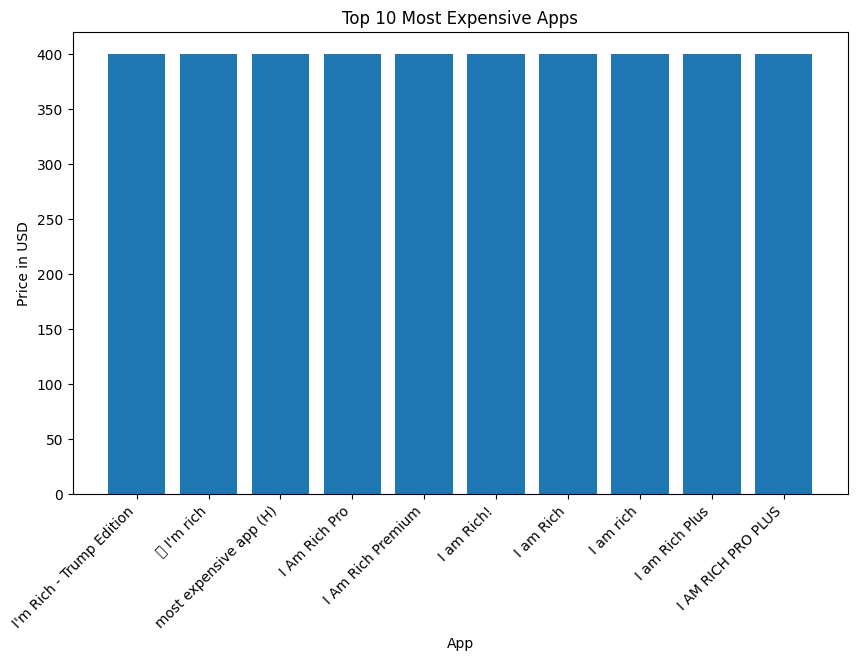

In [91]:
plt.figure(figsize=(10,6))
plt.bar(most_expensive['App'], most_expensive['Price'])
plt.xlabel('App')
plt.ylabel('Price in USD')
plt.title('Top 10 Most Expensive Apps')
plt.xticks(rotation=45, ha='right')
plt.show()

### 2. Which genre has the highest number of apps?

In [92]:
# No. of apps per genre
genre_counts = df['Genres'].value_counts().head(10)

# Display the most common genre
most_common_genre = genre_counts.idxmax()
most_common_count = genre_counts.max()

print(f"The genre with the highest number of apps is '{most_common_genre}' with {most_common_count} apps.")


The genre with the highest number of apps is 'Tools' with 828 apps.


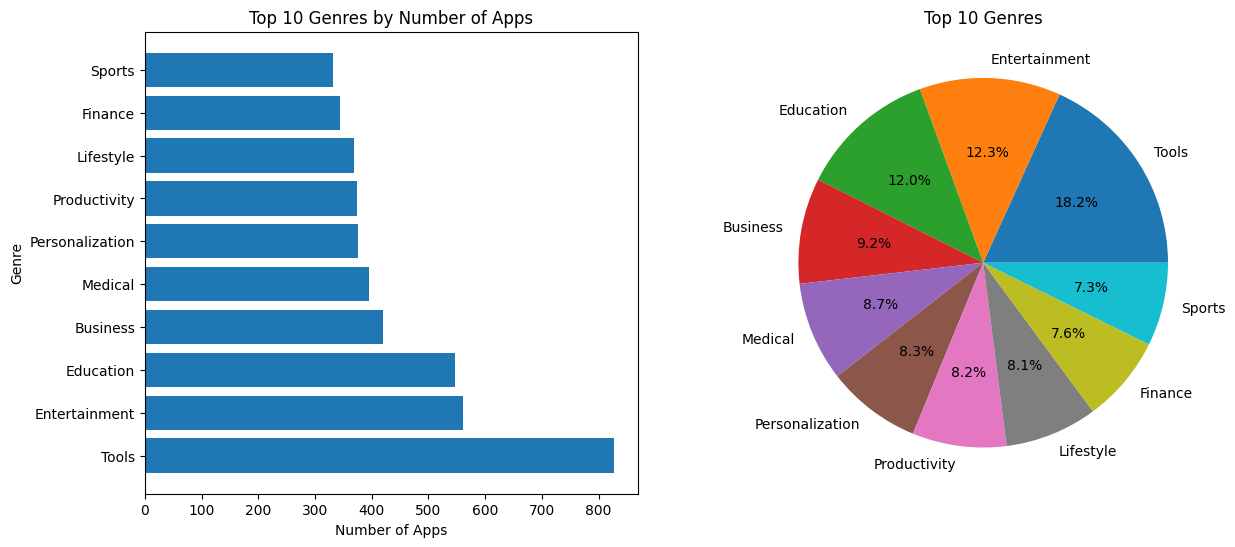

In [93]:
plt.figure(figsize=(14,6))

# Bar Chart
plt.subplot(1, 2, 1)
plt.barh(genre_counts.index, genre_counts.values)
plt.xlabel('Number of Apps')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Number of Apps')


# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(
    genre_counts.values, 
    labels=genre_counts.index, 
    autopct='%1.1f%%',
)
plt.title('Top 10 Genres')


plt.show()

### 3. What is the average size of free vs. paid apps?

In [94]:
# average for both (paid and free)
avg_size = df.groupby('Type')['SizeMB'].mean()

# print result
print(avg_size)


Type
Free    20.516831
Paid    19.048677
Name: SizeMB, dtype: float64


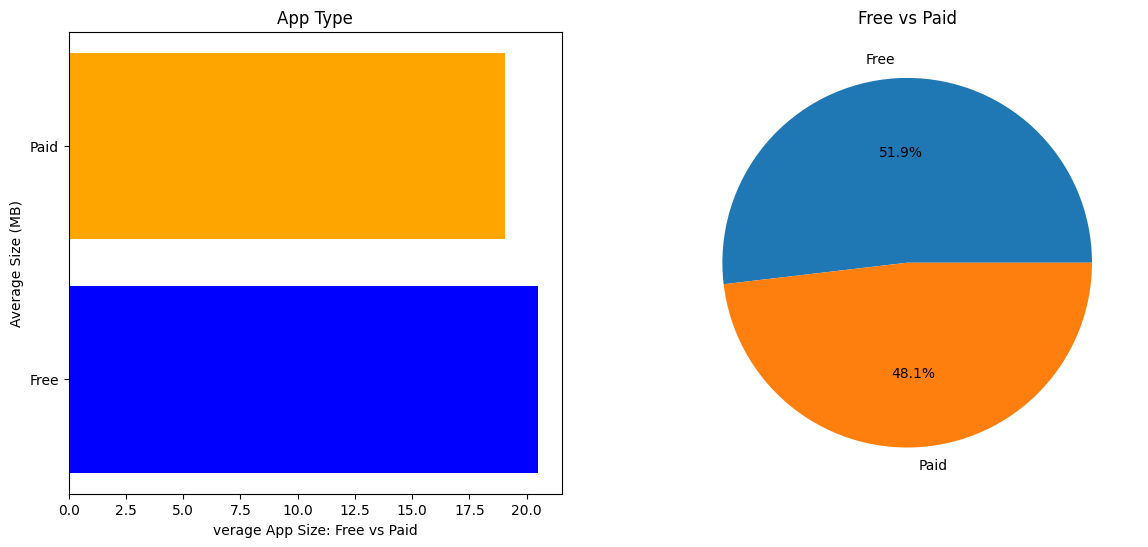

In [95]:
plt.figure(figsize=(14,6))

# Bar Chart
plt.subplot(1, 2, 1)
plt.barh(avg_size.index, avg_size.values, color=['blue', 'orange'])
plt.xlabel('verage App Size: Free vs Paid')
plt.ylabel('Average Size (MB)')
plt.title('App Type')


# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(
    avg_size.values, 
    labels=avg_size.index, 
    autopct='%1.1f%%',
)
plt.title('Free vs Paid')


plt.show()

### 4. What are the top 5 most expensive apps with a perfect rating (5)?

In [96]:
# highest rate apps
high_rate_app = df[df['Rating'] == 5.0]

# sort apps as per price
top10_expensive_app = high_rate_app.sort_values(by='Price', ascending=False).head(10)

# print the result
print(top10_expensive_app)

                                            App             Category  Rating  \
5489                  AP Art History Flashcards               FAMILY     5.0   
7477                 USMLE Step 2 CK Flashcards               FAMILY     5.0   
5482                 meStudying: AP English Lit               FAMILY     5.0   
7204  TI-84 CE Graphing Calculator Manual TI 84               FAMILY     5.0   
5246                      Hey AJ! It's Bedtime!               FAMILY     5.0   
5237                     Hey AJ! It's Saturday!  BOOKS_AND_REFERENCE     5.0   
8287                        AC DC Power Monitor            LIFESTYLE     5.0   
2271                             FHR 5-Tier 2.0              MEDICAL     5.0   
2262   Super Hearing Secret Voices Recorder PRO              MEDICAL     5.0   
3957                               ADS-B Driver                TOOLS     5.0   

      Reviews  Size  Installs  Type  Price Content Rating             Genres  \
5489        1   96M        10  Paid  29

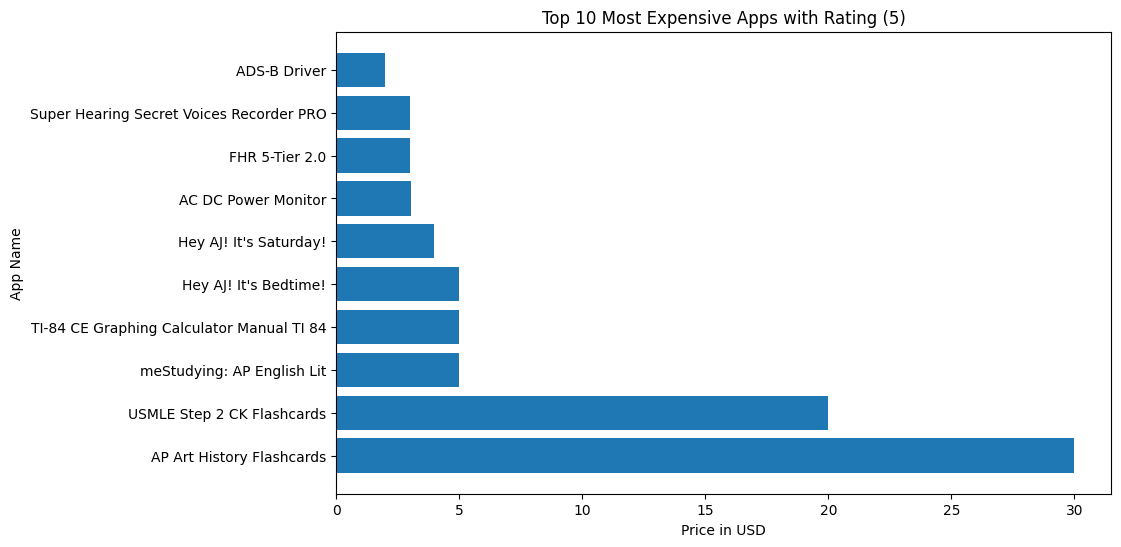

In [97]:
plt.figure(figsize=(10,6))
plt.barh(top10_expensive_app['App'], top10_expensive_app['Price'])
plt.title('Top 10 Most Expensive Apps with Rating (5)')
plt.xlabel('Price in USD')
plt.ylabel('App Name')
plt.show()

### 5. How many apps have received more than 50K reviews?

In [98]:
# get apps with reviwes more than 50K
apps_over_50k = df[df['Reviews'] > 50000]
count_over_50k = apps_over_50k.shape[0]

# No. of apps lowers than 50K review
count_under_50k = df.shape[0] - count_over_50k

# print result
print(f"Number of apps with more than 50K reviews: {count_over_50k}")
print(f"Number of apps with 50K reviews or less: {count_under_50k}")

Number of apps with more than 50K reviews: 1949
Number of apps with 50K reviews or less: 7711


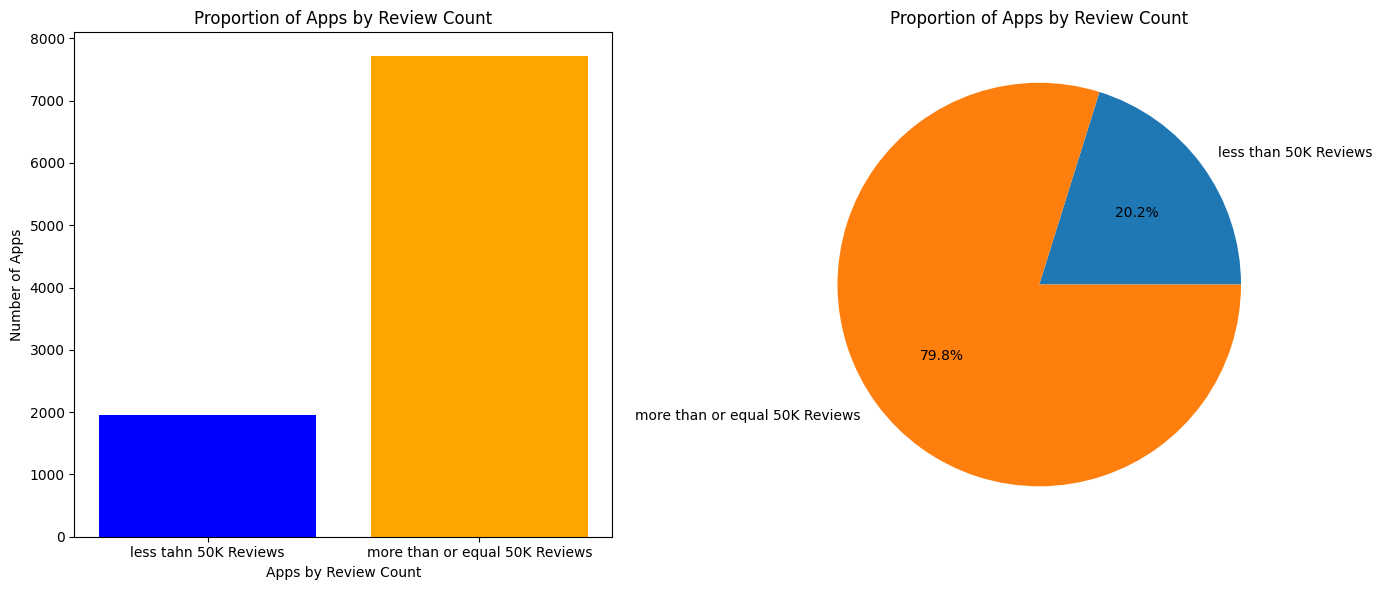

In [99]:
plt.figure(figsize=(14,6))

# Bar Chart
plt.subplot(1, 2, 1)
plt.bar(['less tahn 50K Reviews', 'more than or equal 50K Reviews'], [count_over_50k, count_under_50k], color=['blue', 'orange'])
plt.xlabel('Apps by Review Count')
plt.ylabel('Number of Apps')
plt.title('Proportion of Apps by Review Count')


# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(
    [count_over_50k, count_under_50k], 
    labels=['less than 50K Reviews', 'more than or equal 50K Reviews'], 
    autopct='%1.1f%%',
)
plt.title('Proportion of Apps by Review Count')
plt.tight_layout()

plt.show()

### 6. What is the average price of apps, grouped by genre and number of installs?

In [100]:
# divide installs into bins
bins = [0, 1000, 10000, 50000, 100000, 500000, 1000000, df['Installs'].max()]
labels = ['0-1K','1K-10K','10K-50K','50K-100K','100K-500K','500K-1M','1M+']
df['Installs_group'] = pd.cut(df['Installs'], bins=bins, labels=labels, include_lowest=True)

# calcuate average for genre and installs_group
avg_price = df.groupby(['Genres','Installs_group'])['Price'].mean().unstack()

# print results
print(avg_price)

Installs_group                             0-1K    1K-10K   10K-50K  50K-100K  \
Genres                                                                          
Action                                 0.497619  1.497500  0.398667  0.389268   
Action;Action & Adventure              1.990000  3.490000       NaN       NaN   
Adventure                              2.195000  1.697000  0.831667  0.690769   
Adventure;Action & Adventure                NaN       NaN  4.990000  4.990000   
Adventure;Brain Games                       NaN       NaN       NaN  2.990000   
...                                         ...       ...       ...       ...   
Video Players & Editors                0.041250  0.112258  0.855714  0.000000   
Video Players & Editors;Creativity          NaN       NaN       NaN       NaN   
Video Players & Editors;Music & Video       NaN       NaN       NaN       NaN   
Weather                                1.330000  0.598000  0.000000  0.764667   
Word                        

C:\Users\Client\AppData\Local\Temp\ipykernel_23256\1375207513.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby(['Genres','Installs_group'])['Price'].mean().unstack()


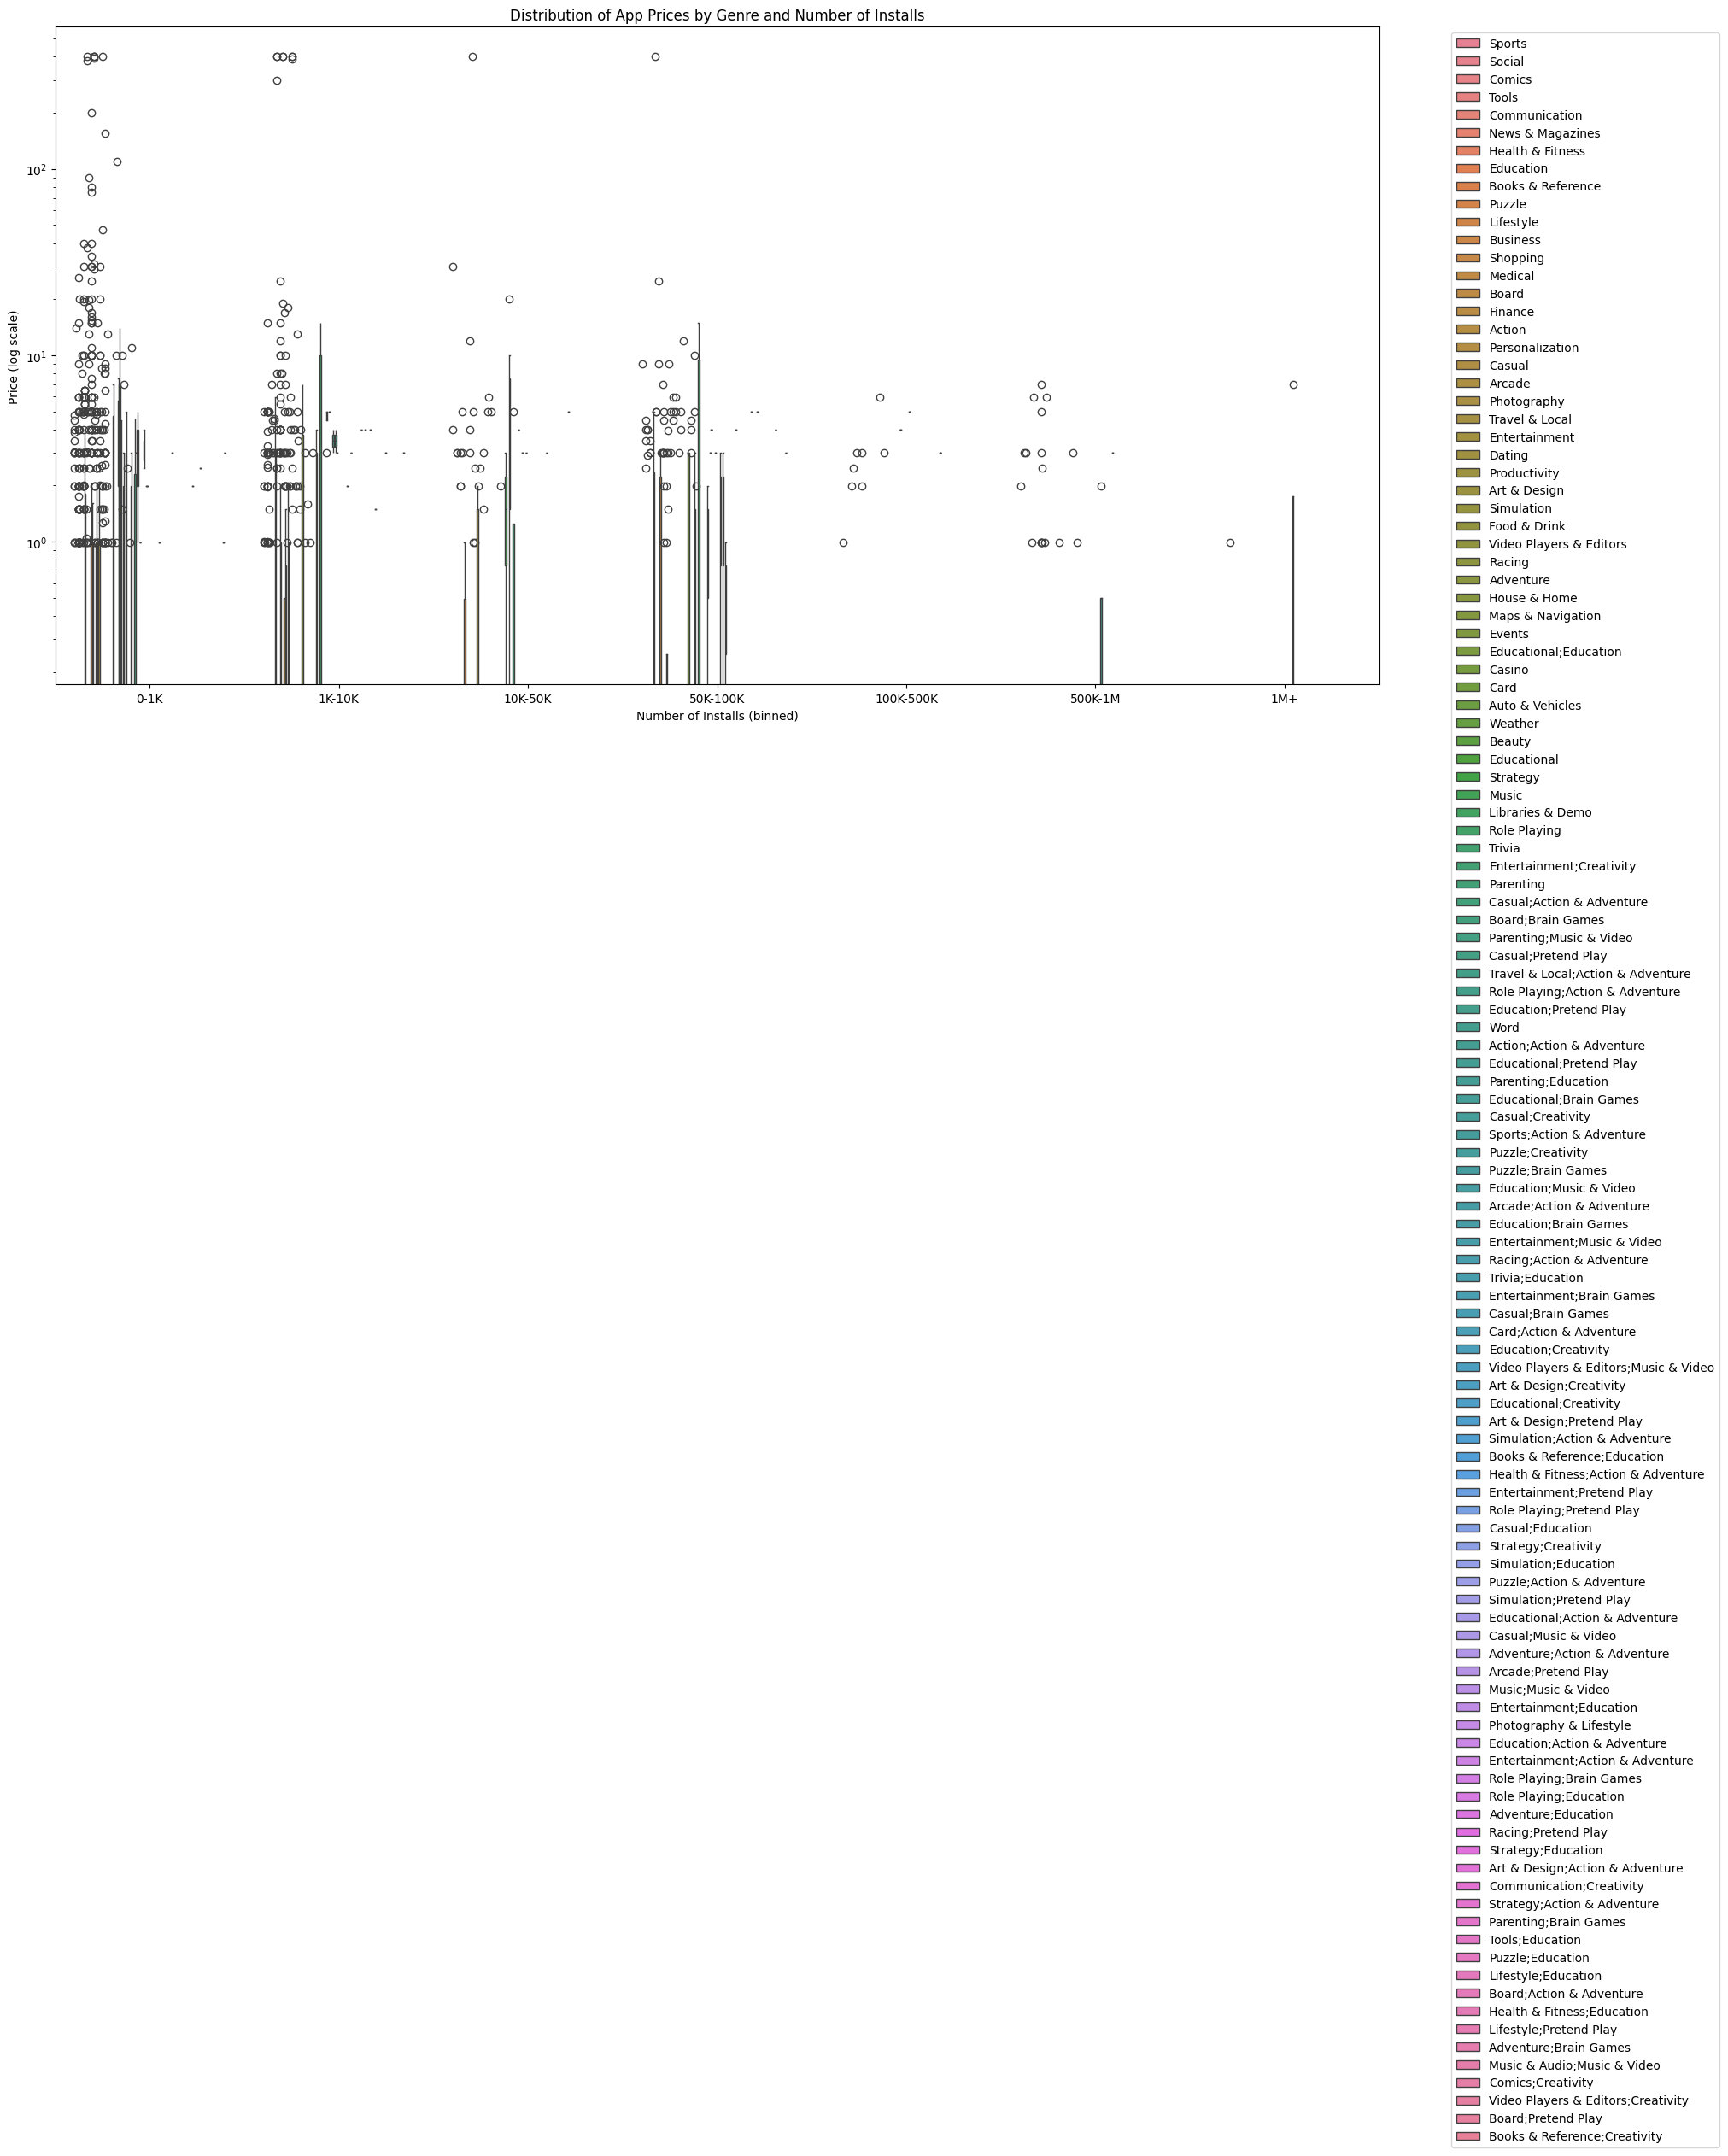

In [101]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Installs_group', y='Price', hue='Genres', data=df)
plt.yscale('log')
plt.title('Distribution of App Prices by Genre and Number of Installs')
plt.xlabel('Number of Installs (binned)')
plt.ylabel('Price (log scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

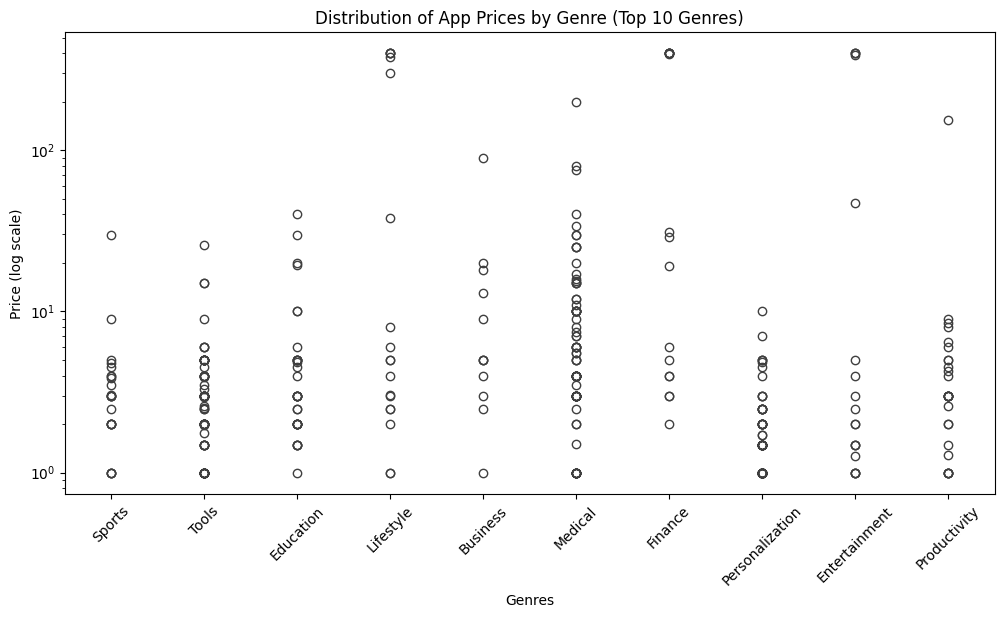

In [102]:
# I'll work with the first 10 apps only for better visualization
top_genres = df['Genres'].value_counts().nlargest(10).index
df_top = df[df['Genres'].isin(top_genres)]

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Genres', y='Price', data=df_top)
plt.yscale('log')
plt.title('Distribution of App Prices by Genre (Top 10 Genres)')
plt.xticks(rotation=45)
plt.ylabel('Price (log scale)')
plt.show()

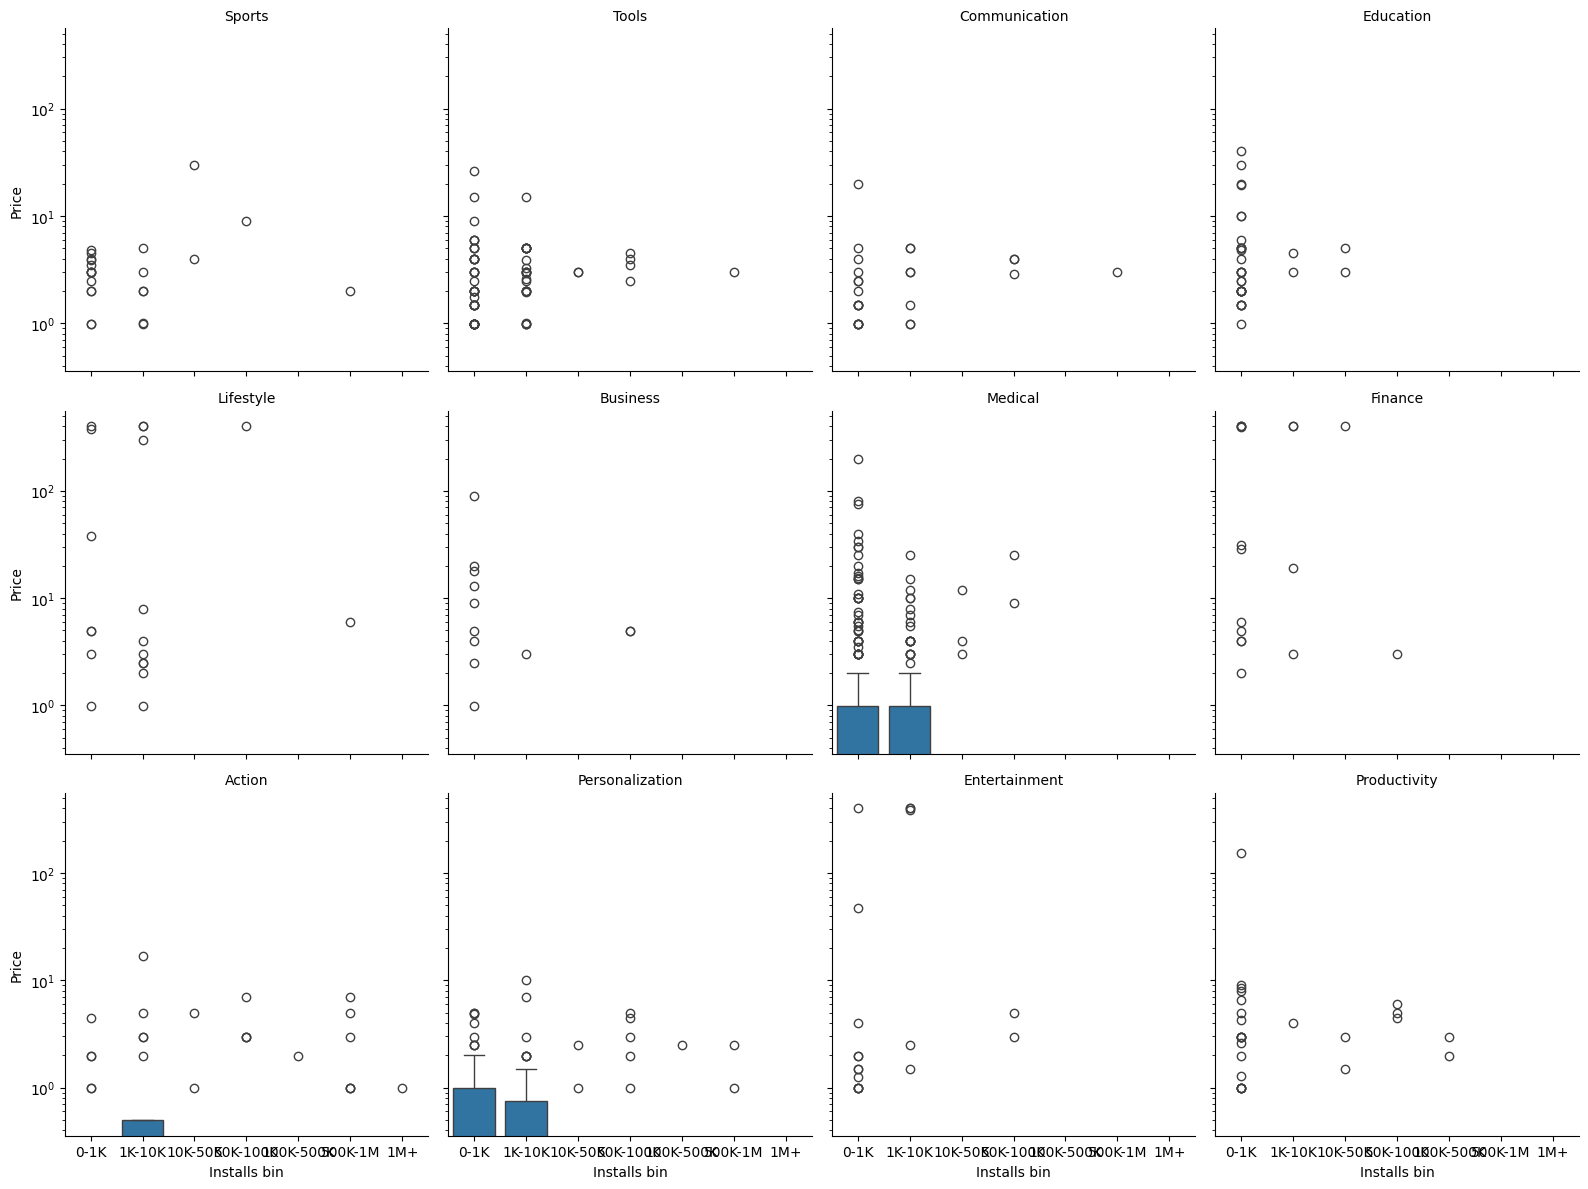

In [103]:
top_genres = df['Genres'].value_counts().nlargest(12).index  # نختار top 12 لتسهيل العرض
df_top = df[df['Genres'].isin(top_genres)]

g = sns.FacetGrid(df_top, col="Genres", col_wrap=4, sharey=True, height=4)
g.map_dataframe(sns.boxplot, x="Installs_group", y="Price")
g.set_titles("{col_name}")
g.set_axis_labels("Installs bin", "Price")
plt.yscale('log')
plt.show()

### 7.	How many apps have a rating higher than 4.7, and what is their average price?

In [105]:
# apss with rate more 4.7
high_rated = df[df['Rating'] > 4.7]

# No. of apps and average
num_high_rated = high_rated.shape[0]
avg_price_high_rated = high_rated['Price'].mean()


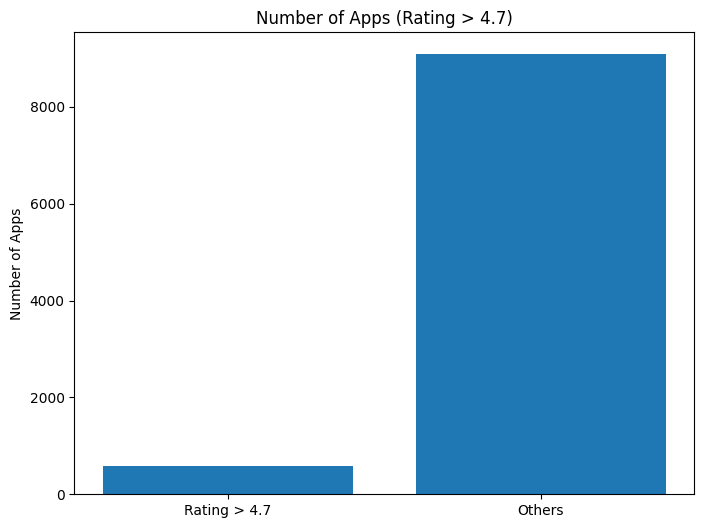

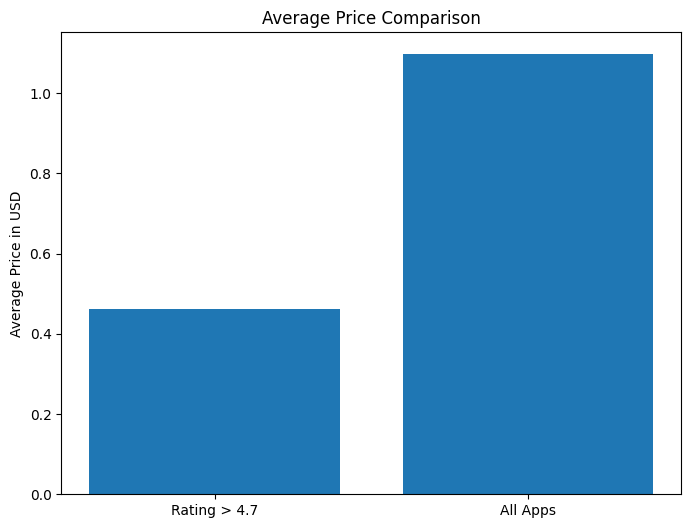

In [106]:
counts = [num_high_rated, df.shape[0] - num_high_rated]

plt.figure(figsize=(8,6))
bars = plt.bar(['Rating > 4.7', 'Others'], [num_high_rated, df.shape[0] - num_high_rated])
plt.title('Number of Apps (Rating > 4.7)')
plt.ylabel('Number of Apps')
plt.show()

# bar chart for average price
plt.figure(figsize=(8,6))
avg_prices = [avg_price_high_rated, df['Price'].mean()]
labels = ['Rating > 4.7', 'All Apps']

plt.bar(['Rating > 4.7', 'All Apps'], [avg_price_high_rated, df['Price'].mean()])
plt.title('Average Price Comparison')
plt.ylabel('Average Price in USD')
plt.show()


### 8.	What is Google's estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)


In [111]:
# apps with 5,000,000+ installs
high_installs = df[df['Installs'] >= 5000000]
# revenue
high_installs['Estimated_Revenue'] = high_installs['Price'] * high_installs['Installs']
# total revenue for all apps
total_revenue = high_installs['Estimated_Revenue'].sum()

# calculate google percentage
google_revenue = total_revenue * 0.30

print(f"Total Revenue for the apps is {total_revenue} $ and Google Estimated Revenue {google_revenue} $")


Total Revenue for the apps is 79800000.0 $ and Google Estimated Revenue 23940000.0 $


C:\Users\Client\AppData\Local\Temp\ipykernel_23256\1904384077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_installs['Estimated_Revenue'] = high_installs['Price'] * high_installs['Installs']


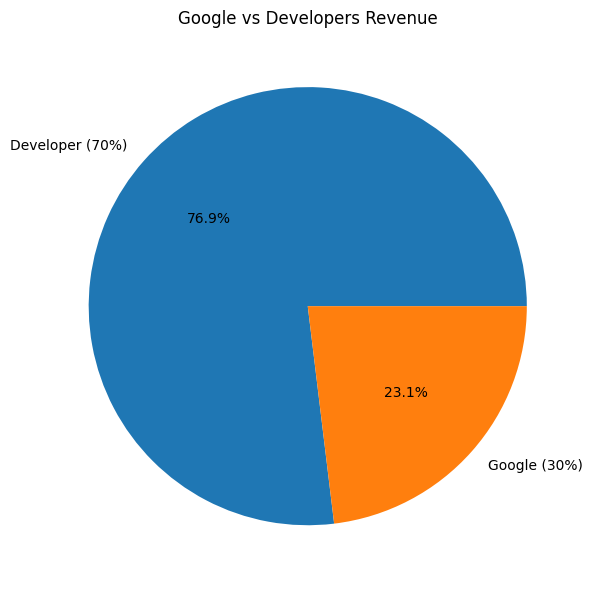

In [112]:
# Pie Chart
plt.figure(figsize=(8,6))
plt.pie(
    [total_revenue, google_revenue], 
    labels=['Developer (70%)', 'Google (30%)'], 
    autopct='%1.1f%%',
)
plt.title('Google vs Developers Revenue')
plt.tight_layout()

plt.show()

### 9. What are the maximum and minimum sizes of free vs. paid apps?

In [113]:
# calculate the max and min size for each paid and free apps
size_stats = df.groupby('Type')['SizeMB'].agg(['min', 'max']).reset_index()
print(size_stats)


   Type       min    max
0  Free  0.008301  100.0
1  Paid  0.013672  100.0


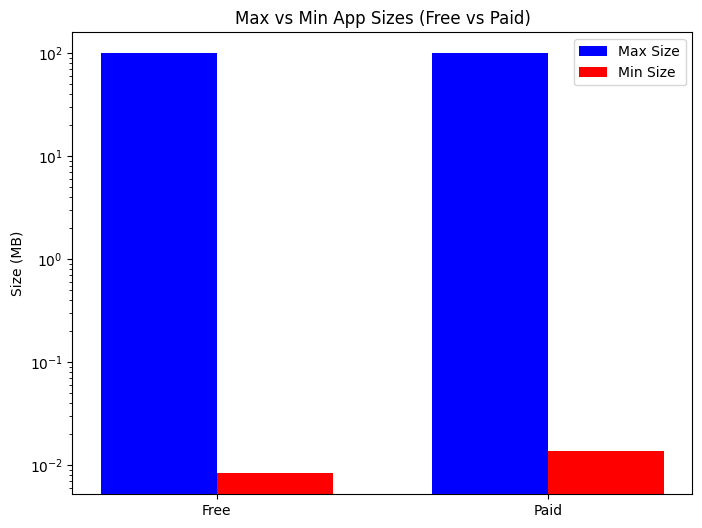

In [121]:
plt.figure(figsize=(8,6))

x = np.arange(len(size_stats['Type']))
width = 0.35

plt.bar(x - width/2, size_stats['max'], width, label='Max Size', color='blue')
plt.bar(x + width/2, size_stats['min'], width, label='Min Size', color='red')

plt.yscale('log')
plt.xticks(x, size_stats['Type'])
plt.title('Max vs Min App Sizes (Free vs Paid)')
plt.ylabel('Size (MB)')
plt.legend()
plt.show()


### 10.	Is there a correlation between an app’s rating, number of reviews, size, and its price?

In [124]:
corr_df = df[['Rating', 'Reviews', 'SizeMB', 'Price']]
corr_df.isna().sum()

Rating        0
Reviews       0
SizeMB     1228
Price         0
dtype: int64

In [125]:
corr_df = corr_df.dropna()
corr_matrix = corr_df.corr()
print(corr_matrix)

           Rating   Reviews    SizeMB     Price
Rating   1.000000  0.058350  0.047554 -0.079794
Reviews  0.058350  1.000000  0.179175 -0.008666
SizeMB   0.047554  0.179175  1.000000 -0.022367
Price   -0.079794 -0.008666 -0.022367  1.000000


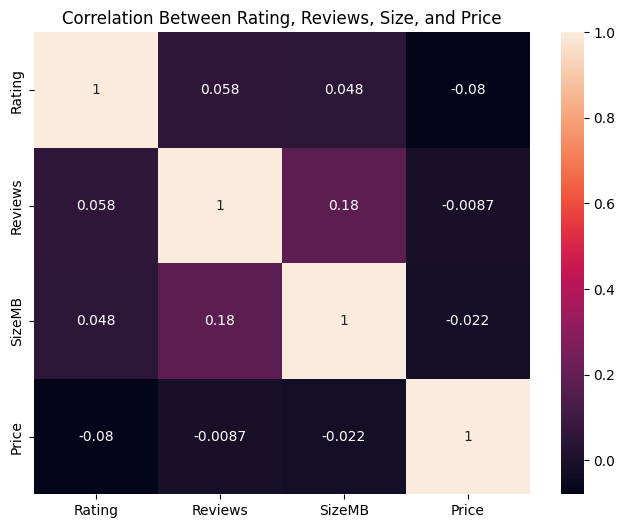

In [131]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Between Rating, Reviews, Size, and Price")
plt.show()

In [132]:
# The answer is there is no correlation between those features

### 11.	How many apps exist for each type (free/paid) across different content ratings?

In [134]:
type_content = df.groupby(['Content Rating', 'Type']).size().unstack(fill_value=0)
type_content

Type,Free,Paid
Content Rating,,
Adults only 18+,3,0
Everyone,7251,653
Everyone 10+,291,31
Mature 17+,375,18
Teen,984,52
Unrated,2,0


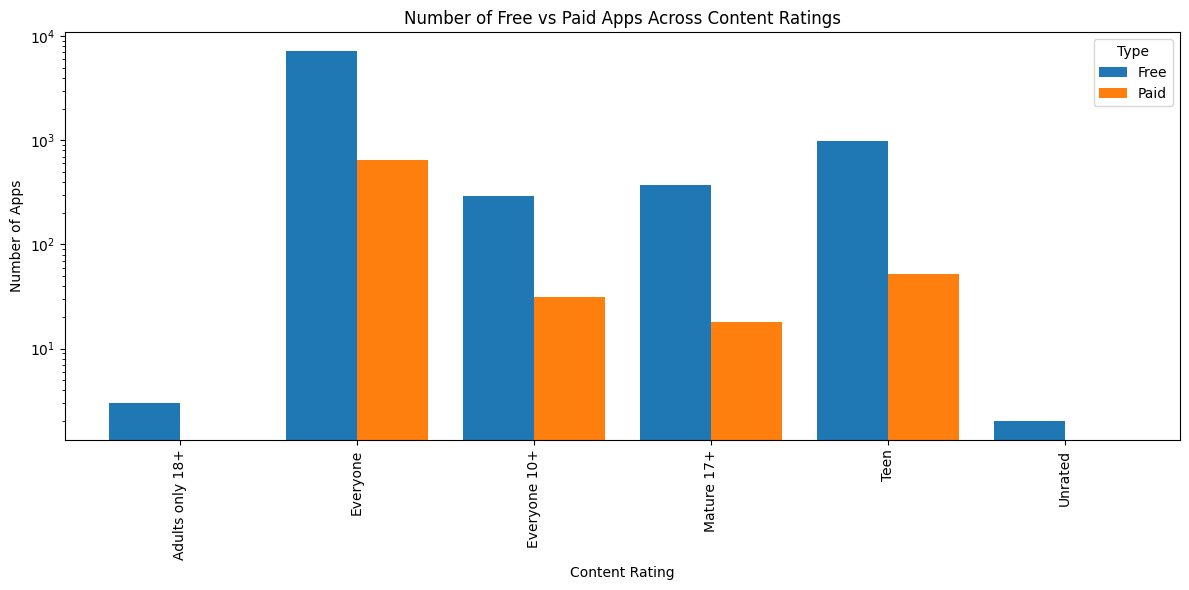

In [144]:
type_content.plot(kind='bar', figsize=(12,6), logy=True, width=0.8)

plt.title('Number of Free vs Paid Apps Across Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


### 12.	How many apps are compatible with Android version 4.x?

In [146]:
# Extract the version number and convert it into numeric value
df['Min_Android'] = df['Android Ver'].str.extract(r'(\d+\.?\d*)')
df['Min_Android'] = pd.to_numeric(df['Min_Android'], errors='coerce')

# choose all apps that compatible with 4.x version (4 or less)
compatible_apps = df[df['Min_Android'] <= 4.9]

count_compatible = compatible_apps.shape[0]
print(f"Number of apps compatible with Android 4.x: {count_compatible}")




Number of apps compatible with Android 4.x: 8025


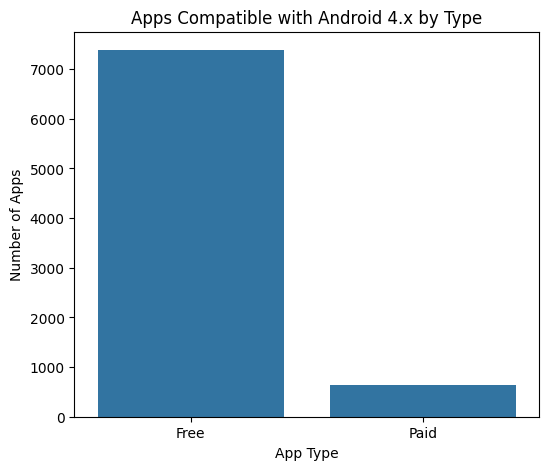

In [152]:
plt.figure(figsize=(6,5))
sns.countplot(data=compatible_apps, x='Type')
plt.title('Apps Compatible with Android 4.x by Type')
plt.xlabel('App Type')
plt.ylabel('Number of Apps')
plt.show()